In [1]:
# important packages
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# packages for the figure
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

import os


# modeling packages
import statsmodels.api as sm
import statsmodels.formula as smf
from statsmodels.iolib.summary2 import summary_col # creating summary tables
import math

In [2]:
# directory to save figure
dir = ('C:\\Users\\rbishwakarma\\Desktop\\value_proposition_in_python\\value_proposition\\figures')

In [3]:
# main data
os.chdir('C:\\Users\\rbishwakarma\\Desktop\\value_proposition_in_python\\value_proposition')
df = pd.read_stata('final.dta')

# removing missing universities for the analysis
df = df.dropna(axis = 0, how = 'any', subset = ['retentionrate'])

# dropping values from the missing
df = df.dropna(axis = 0, how='any', subset=['stem'])
df.reset_index(drop=True, inplace=True)

In [4]:
# Models
model = df[['SCE', 'SCE2', 'research_FTE', 'SATtoACT_math_25', 'pell_grants', 'stem',
             'female', 'white_percent', 'hispanic_percent', 'asian_percent', 'R1']]

retent = df['retentionrate']

w = df['pwht']
s = df['state']

# regression
m = sm.WLS(retent, sm.add_constant(model), weights = w).fit(cov_type='cluster', cov_kwds = {'groups': s}) 
# save coefficient
coefficients = m.params

#UNM estimation

In [5]:
# creating values using the UNM characteristics
retent = {}
for i in range(1, 100):
    retent[i] = [math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i)+ 
             m.params.research_FTE* 8.082  + m.params.SATtoACT_math_25* 20 + 
             m.params.pell_grants*40 + m.params.stem*17 + m.params.female*55.25455 + 
             m.params.white_percent*35.59087 + m.params.hispanic_percent*44.62803 + 
             m.params.asian_percent*3.052923 + m.params.R1*1) /
            (1+math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i)+ 
             m.params.research_FTE* 8.082  + m.params.SATtoACT_math_25* 20 + 
             m.params.pell_grants*40 + m.params.stem*17 + m.params.female*55.25455 + 
             m.params.white_percent*35.59087 + m.params.hispanic_percent*44.62803 + 
             m.params.asian_percent*3.052923 + m.params.R1*1))]


In [6]:
data = pd.DataFrame.from_dict(retent, orient='index', columns= ['y'])
data['x'] = data.index
data['y'] = data['y']*100

#R1 + public estimation 

In [7]:
# use a new data to save means of the relevant colmns for R-public
df = pd.read_stata('final.dta')
df2 = df[(df['public_uni'] != 0) & (df['R1'] != 0)]

model = ['SCE', 'SCE2', 'research_FTE', 'SATtoACT_math_25', 'pell_grants', 'stem',
             'female', 'white_percent', 'hispanic_percent', 'asian_percent', 'R1']

In [8]:
# create column mean
mean = {}
for i in range(len(model)):
    mean["mean_"+ str(model[i])] = df2[model[i]].mean()
    
# create a new dataframe
pd.DataFrame(mean.items())
mean = pd.DataFrame(mean.items(), columns=['z', 'v'])
mean = mean.set_index(['z'])
mean = mean.transpose()

In [9]:
r1_public = {}
for i in range(1, 100):
    r1_public[i] = [math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i) +
                    m.params.research_FTE* mean.mean_research_FTE +  
                    m.params.SATtoACT_math_25* mean.mean_SATtoACT_math_25 + 
                    m.params.pell_grants*mean.mean_pell_grants + m.params.stem*mean.mean_stem + 
                    m.params.female*mean.mean_female + 
                    m.params.white_percent*mean.mean_white_percent + 
                    m.params.hispanic_percent*mean.mean_hispanic_percent + 
                    m.params.asian_percent*mean.mean_asian_percent + m.params.R1*mean.mean_R1)/
    (1+math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i) +
                    m.params.research_FTE* mean.mean_research_FTE +  
                    m.params.SATtoACT_math_25* mean.mean_SATtoACT_math_25 + 
                    m.params.pell_grants*mean.mean_pell_grants + m.params.stem*mean.mean_stem + 
                    m.params.female*mean.mean_female + 
                    m.params.white_percent*mean.mean_white_percent + 
                    m.params.hispanic_percent*mean.mean_hispanic_percent + 
                    m.params.asian_percent*mean.mean_asian_percent + m.params.R1*mean.mean_R1))] 
            

In [10]:
# convert dict to dataframe
r1_public = pd.DataFrame.from_dict(r1_public, orient='index', columns= ['y'])
r1_public['x'] = r1_public.index
r1_public['y'] = r1_public['y']*100

# Figure 11

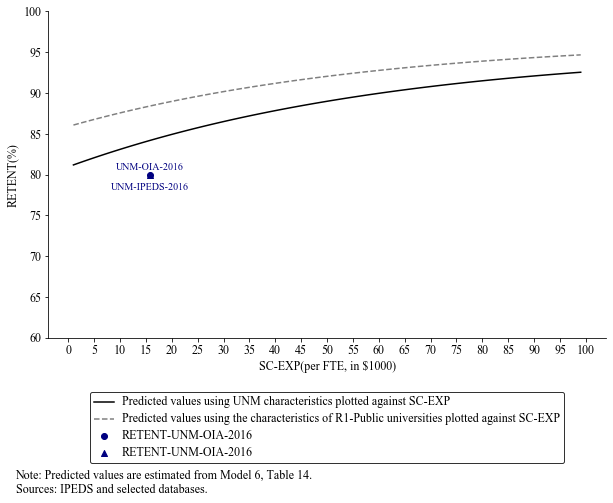

In [11]:
# figure
fig, ax = plt.subplots(figsize=(10, 6))

# UNM OIA
ax.scatter(15.779, 80, 
        marker = 'o', color = 'navy', label = 'RETENT-UNM-OIA-2016')

plt.annotate('UNM-OIA-2016',
                 (15.779, 80), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 horizontalalignment='center',
                fontfamily = 'Times New Roman',
                color = 'navy')

# UNM IPEDS
ax.scatter(15.779, 80, 
        marker = '^', color = 'navy', label = 'RETENT-UNM-OIA-2016')

plt.annotate('UNM-IPEDS-2016',
                 (15.779, 80), 
                 textcoords='offset points', 
                 xytext=(0,-15), 
                 horizontalalignment='center',
                fontfamily = 'Times New Roman',
                color = 'navy')

# UNM characteristics
ax.plot(data['x'], data['y'],
       color = 'black', 
       label = 'Predicted values using UNM characteristics plotted against SC-EXP')

# R1-public characteristics
ax.plot(r1_public['x'], r1_public['y'],
       color = 'grey', 
       linestyle = '--',
       label = 'Predicted values using the characteristics of R1-Public universities plotted against SC-EXP')

# formatting - labels
plt.ylabel('RETENT(%)', fontsize = 12, family = 'Times New Roman')
plt.xlabel('SC-EXP(per FTE, in $1000)', fontsize = 12, family = 'Times New Roman')

# axis
plt.yticks(np.arange(60, 100+1, 5), 
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.xticks(np.arange(0, 100 + 1, 5), 
           fontsize = 12, 
           family = 'Times New Roman')

# legend
leg = plt.legend(bbox_to_anchor=(0.5, -0.4), loc="lower center", edgecolor="black",
           ncol=1)
plt.setp(leg.get_texts(), fontsize =12, family = 'Times New Roman')

# notes
note = 'Note: Predicted values are estimated from Model 6, Table 14. \n Sources: IPEDS and selected databases.'
plt.figtext(0.08, -0.23, note, wrap=True, horizontalalignment='left', 
            fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(dir+'\\figure11.png', bbox_inches = 'tight')

plt.show()

# Figure 12

In [12]:
# import data
df = pd.read_stata('final.dta')

# removing missing universities for the analysis
df = df.dropna(axis = 0, how = 'any', subset = ['fourrate'])

# dropping values from the missing
df = df.dropna(axis = 0, how='any', subset=['stem'])
df.reset_index(drop=True, inplace=True)

# Models
model = df[['SCE', 'SCE2', 'research_FTE', 'SATtoACT_math_25', 'pell_grants', 'stem',
             'female', 'white_percent', 'hispanic_percent', 'asian_percent', 'R1']]

y = df['fourrate']
w = df['pwht']
s = df['state']

# regression
m = sm.WLS(y, sm.add_constant(model), weights = w).fit(cov_type='cluster', cov_kwds = {'groups': s}) 
# save coefficient
coefficients = m.params

In [13]:
# creating values using the UNM characteristics
y_current = {}
for i in range(1, 100):
    y_current[i] = [math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i)+ 
             m.params.research_FTE* 8.082  + m.params.SATtoACT_math_25* 20 + 
             m.params.pell_grants*40 + m.params.stem*17 + m.params.female*55.25455 + 
             m.params.white_percent*35.59087 + m.params.hispanic_percent*44.62803 + 
             m.params.asian_percent*3.052923 + m.params.R1*1) /
            (1+math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i)+ 
             m.params.research_FTE* 8.082  + m.params.SATtoACT_math_25* 20 + 
             m.params.pell_grants*40 + m.params.stem*17 + m.params.female*55.25455 + 
             m.params.white_percent*35.59087 + m.params.hispanic_percent*44.62803 + 
             m.params.asian_percent*3.052923 + m.params.R1*1))]
    
# create dataframe
data = pd.DataFrame.from_dict(y_current, orient='index', columns= ['y'])
data['x'] = data.index
data['y'] = data['y']*100

In [14]:
# use a new data to save means of the relevant colmns for R-public
df = pd.read_stata('final.dta')
df2 = df[(df['public_uni'] != 0) & (df['R1'] != 0)]

model = ['SCE', 'SCE2', 'research_FTE', 'SATtoACT_math_25', 'pell_grants', 'stem',
             'female', 'white_percent', 'hispanic_percent', 'asian_percent', 'R1']

# create column mean
mean = {}
for i in range(len(model)):
    mean["mean_"+ str(model[i])] = df2[model[i]].mean()
    
# create a new dataframe
pd.DataFrame(mean.items())
mean = pd.DataFrame(mean.items(), columns=['z', 'v'])
mean = mean.set_index(['z'])
mean = mean.transpose()

r1_public = {}
for i in range(1, 100):
    r1_public[i] = [math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i) +
                    m.params.research_FTE* mean.mean_research_FTE +  
                    m.params.SATtoACT_math_25* mean.mean_SATtoACT_math_25 + 
                    m.params.pell_grants*mean.mean_pell_grants + m.params.stem*mean.mean_stem + 
                    m.params.female*mean.mean_female + 
                    m.params.white_percent*mean.mean_white_percent + 
                    m.params.hispanic_percent*mean.mean_hispanic_percent + 
                    m.params.asian_percent*mean.mean_asian_percent + m.params.R1*mean.mean_R1)/
    (1+math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i) +
                    m.params.research_FTE* mean.mean_research_FTE +  
                    m.params.SATtoACT_math_25* mean.mean_SATtoACT_math_25 + 
                    m.params.pell_grants*mean.mean_pell_grants + m.params.stem*mean.mean_stem + 
                    m.params.female*mean.mean_female + 
                    m.params.white_percent*mean.mean_white_percent + 
                    m.params.hispanic_percent*mean.mean_hispanic_percent + 
                    m.params.asian_percent*mean.mean_asian_percent + m.params.R1*mean.mean_R1))] 


# convert dict to dataframe
r1_public = pd.DataFrame.from_dict(r1_public, orient='index', columns= ['y'])
r1_public['x'] = r1_public.index
r1_public['y'] = r1_public['y']*100

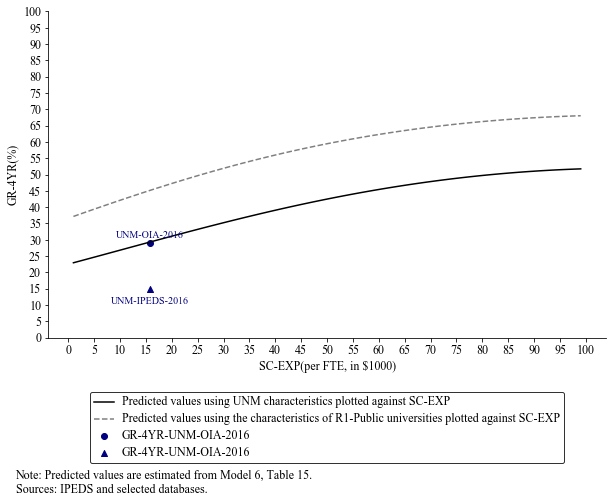

In [15]:
# figure
fig, ax = plt.subplots(figsize=(10, 6))

# UNM OIA
ax.scatter(15.779, 29, 
        marker = 'o', color = 'navy', label = 'GR-4YR-UNM-OIA-2016')

plt.annotate('UNM-OIA-2016',
                 (15.779, 29), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 horizontalalignment='center',
                fontfamily = 'Times New Roman',
                color = 'navy')

# UNM IPEDS
ax.scatter(15.779, 15, 
        marker = '^', color = 'navy', label = 'GR-4YR-UNM-OIA-2016')

plt.annotate('UNM-IPEDS-2016',
                 (15.779, 15), 
                 textcoords='offset points', 
                 xytext=(0,-15), 
                 horizontalalignment='center',
                fontfamily = 'Times New Roman',
                color = 'navy')

# UNM characteristics
ax.plot(data['x'], data['y'],
       color = 'black', 
       label = 'Predicted values using UNM characteristics plotted against SC-EXP')

# R1-public characteristics
ax.plot(r1_public['x'], r1_public['y'],
       color = 'grey', 
       linestyle = '--',
       label = 'Predicted values using the characteristics of R1-Public universities plotted against SC-EXP')

# formatting - labels
plt.ylabel('GR-4YR(%)', fontsize = 12, family = 'Times New Roman')
plt.xlabel('SC-EXP(per FTE, in $1000)', fontsize = 12, family = 'Times New Roman')

# axis
plt.yticks(np.arange(0, 100+1, 5), 
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.xticks(np.arange(0, 100 + 1, 5), 
           fontsize = 12, 
           family = 'Times New Roman')

# legend
leg = plt.legend(bbox_to_anchor=(0.5, -0.4), loc="lower center", edgecolor="black",
           ncol=1)
plt.setp(leg.get_texts(), fontsize =12, family = 'Times New Roman')

# notes
note = 'Note: Predicted values are estimated from Model 6, Table 15. \n Sources: IPEDS and selected databases.'
plt.figtext(0.08, -0.23, note, wrap=True, horizontalalignment='left', 
            fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(dir+'\\figure12.png', bbox_inches = 'tight')

plt.show()

# Figure 13

In [16]:
# import data
df = pd.read_stata('final.dta')

# removing missing universities for the analysis
df = df.dropna(axis = 0, how = 'any', subset = ['sixrate'])

# dropping values from the missing
df = df.dropna(axis = 0, how='any', subset=['stem'])
df.reset_index(drop=True, inplace=True)

# Models
model = df[['SCE', 'SCE2', 'research_FTE', 'SATtoACT_math_25', 'pell_grants', 'stem',
             'female', 'white_percent', 'hispanic_percent', 'asian_percent', 'R1']]

y = df['sixrate']
w = df['pwht']
s = df['state']

# regression
m = sm.WLS(y, sm.add_constant(model), weights = w).fit(cov_type='cluster', cov_kwds = {'groups': s}) 
# save coefficient
coefficients = m.params

In [17]:
# creating values using the UNM characteristics
y_current = {}
for i in range(1, 100):
    y_current[i] = [math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i)+ 
             m.params.research_FTE* 8.082  + m.params.SATtoACT_math_25* 20 + 
             m.params.pell_grants*40 + m.params.stem*17 + m.params.female*55.25455 + 
             m.params.white_percent*35.59087 + m.params.hispanic_percent*44.62803 + 
             m.params.asian_percent*3.052923 + m.params.R1*1) /
            (1+math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i)+ 
             m.params.research_FTE* 8.082  + m.params.SATtoACT_math_25* 20 + 
             m.params.pell_grants*40 + m.params.stem*17 + m.params.female*55.25455 + 
             m.params.white_percent*35.59087 + m.params.hispanic_percent*44.62803 + 
             m.params.asian_percent*3.052923 + m.params.R1*1))]
    
# create dataframe
data = pd.DataFrame.from_dict(y_current, orient='index', columns= ['y'])
data['x'] = data.index
data['y'] = data['y']*100

In [18]:
# use a new data to save means of the relevant colmns for R-public
df = pd.read_stata('final.dta')
df2 = df[(df['public_uni'] != 0) & (df['R1'] != 0)]

model = ['SCE', 'SCE2', 'research_FTE', 'SATtoACT_math_25', 'pell_grants', 'stem',
             'female', 'white_percent', 'hispanic_percent', 'asian_percent', 'R1']

# create column mean
mean = {}
for i in range(len(model)):
    mean["mean_"+ str(model[i])] = df2[model[i]].mean()
    
# create a new dataframe
pd.DataFrame(mean.items())
mean = pd.DataFrame(mean.items(), columns=['z', 'v'])
mean = mean.set_index(['z'])
mean = mean.transpose()

r1_public = {}
for i in range(1, 100):
    r1_public[i] = [math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i) +
                    m.params.research_FTE* mean.mean_research_FTE +  
                    m.params.SATtoACT_math_25* mean.mean_SATtoACT_math_25 + 
                    m.params.pell_grants*mean.mean_pell_grants + m.params.stem*mean.mean_stem + 
                    m.params.female*mean.mean_female + 
                    m.params.white_percent*mean.mean_white_percent + 
                    m.params.hispanic_percent*mean.mean_hispanic_percent + 
                    m.params.asian_percent*mean.mean_asian_percent + m.params.R1*mean.mean_R1)/
    (1+math.exp(m.params.const + m.params.SCE*i + m.params.SCE2*(i *i) +
                    m.params.research_FTE* mean.mean_research_FTE +  
                    m.params.SATtoACT_math_25* mean.mean_SATtoACT_math_25 + 
                    m.params.pell_grants*mean.mean_pell_grants + m.params.stem*mean.mean_stem + 
                    m.params.female*mean.mean_female + 
                    m.params.white_percent*mean.mean_white_percent + 
                    m.params.hispanic_percent*mean.mean_hispanic_percent + 
                    m.params.asian_percent*mean.mean_asian_percent + m.params.R1*mean.mean_R1))] 


# convert dict to dataframe
r1_public = pd.DataFrame.from_dict(r1_public, orient='index', columns= ['y'])
r1_public['x'] = r1_public.index
r1_public['y'] = r1_public['y']*100

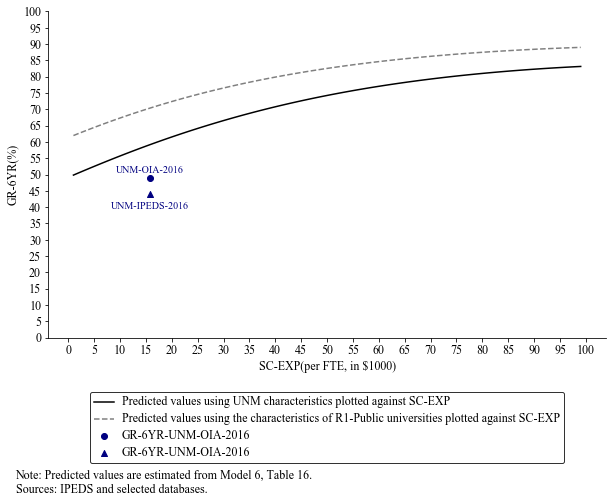

In [19]:
# figure
fig, ax = plt.subplots(figsize=(10, 6))

# UNM OIA
ax.scatter(15.779, 49, 
        marker = 'o', color = 'navy', label = 'GR-6YR-UNM-OIA-2016')

plt.annotate('UNM-OIA-2016',
                 (15.779, 49), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 horizontalalignment='center',
                fontfamily = 'Times New Roman',
                color = 'navy')

# UNM IPEDS
ax.scatter(15.779, 44, 
        marker = '^', color = 'navy', label = 'GR-6YR-UNM-OIA-2016')

plt.annotate('UNM-IPEDS-2016',
                 (15.779, 44), 
                 textcoords='offset points', 
                 xytext=(0,-15), 
                 horizontalalignment='center',
                fontfamily = 'Times New Roman',
                color = 'navy')

# UNM characteristics
ax.plot(data['x'], data['y'],
       color = 'black', 
       label = 'Predicted values using UNM characteristics plotted against SC-EXP')

# R1-public characteristics
ax.plot(r1_public['x'], r1_public['y'],
       color = 'grey', 
       linestyle = '--',
       label = 'Predicted values using the characteristics of R1-Public universities plotted against SC-EXP')

# formatting - labels
plt.ylabel('GR-6YR(%)', fontsize = 12, family = 'Times New Roman')
plt.xlabel('SC-EXP(per FTE, in $1000)', fontsize = 12, family = 'Times New Roman')

# axis
plt.yticks(np.arange(0, 100+1, 5), 
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.xticks(np.arange(0, 100 + 1, 5), 
           fontsize = 12, 
           family = 'Times New Roman')

# legend
leg = plt.legend(bbox_to_anchor=(0.5, -0.4), loc="lower center", edgecolor="black",
           ncol=1)
plt.setp(leg.get_texts(), fontsize =12, family = 'Times New Roman')

# notes
note = 'Note: Predicted values are estimated from Model 6, Table 16. \n Sources: IPEDS and selected databases.'
plt.figtext(0.08, -0.23, note, wrap=True, horizontalalignment='left', 
            fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(dir+'\\figure13.png', bbox_inches = 'tight')

plt.show()